# Boston House Price
* <font color = 'blue'>'boston.csv' (506 * 14)</font>

 - CRIM: 범죄 발생률
 - ZN: 25,000평방피트를 초과하는 거주 지역의 비율
 -  INDUS: 비소매 상업 지역 비율
 - CHAS: 찰스강 인접 여부(강주변 1, 아니면 0)
 - NOX: 일산화질소 농도
 - RM: 거주 목적 방 개수
 - AGE: 1940년 이전 건축된 주택 비율
 - DIS: 보스턴 5대 고용지역까지 거리
 - RAD: 고속도로 접근성
 - TAX: 10,000달러당 재산세율
 - PTRATIO: 교사와 학생 수 비율
 - B: 흑인 거주 비율
 - LSTAT: 하위 계층 비율
 - <font color = 'red'>PRICE: 주택 가격 -> 'y'

In [2]:
import warnings
warnings.filterwarnings('ignore')

# I. Data Load
* 'boston.csv' Github에서 읽어오기

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/boston.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
DF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# II. 탐색적 데이터 분석(EDA)

> ## 1) 'PRICE' 분포

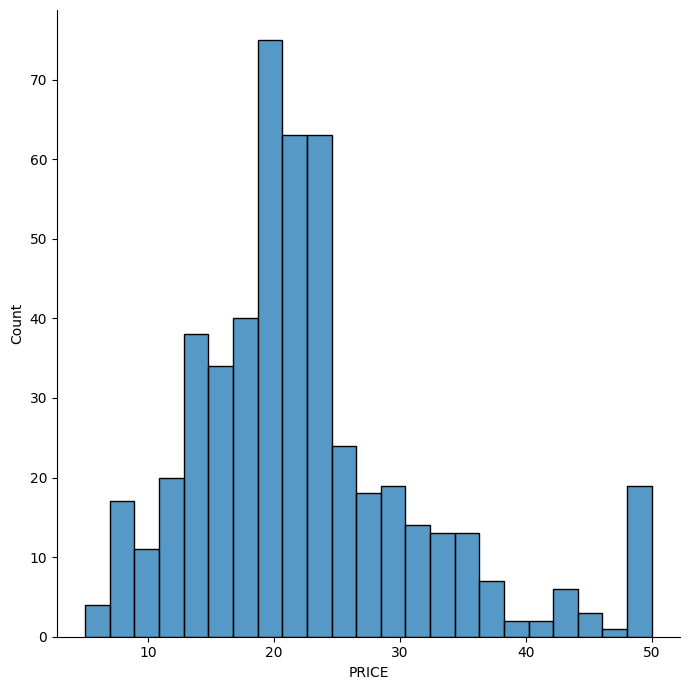

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(x = 'PRICE',
            data = DF,
            height = 7)
plt.show()

* 'PRICE' 평균

In [6]:
DF['PRICE'].mean()

22.532806324110677

# scaling
- 갭이 크지 않으므로 생략

# III. train_test_split( )

* 8 : 2
 - random_state = 2045

In [7]:
from sklearn.model_selection import train_test_split

X = DF.iloc[:, :-1]
y = DF.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (404, 13) (404,)
Test Data :  (102, 13) (102,)


# IV. Modeling

## Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

LR= LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [28]:
# 예측
y_hat = LR.predict(X_test)

In [29]:
# 평가
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse1 = mean_squared_error(y_test, y_hat)
print('RMSE', np.sqrt(mse1))
print('R2', r2_score(y_test, y_hat))

RMSE 4.358583622645482
R2 0.7234269461973974


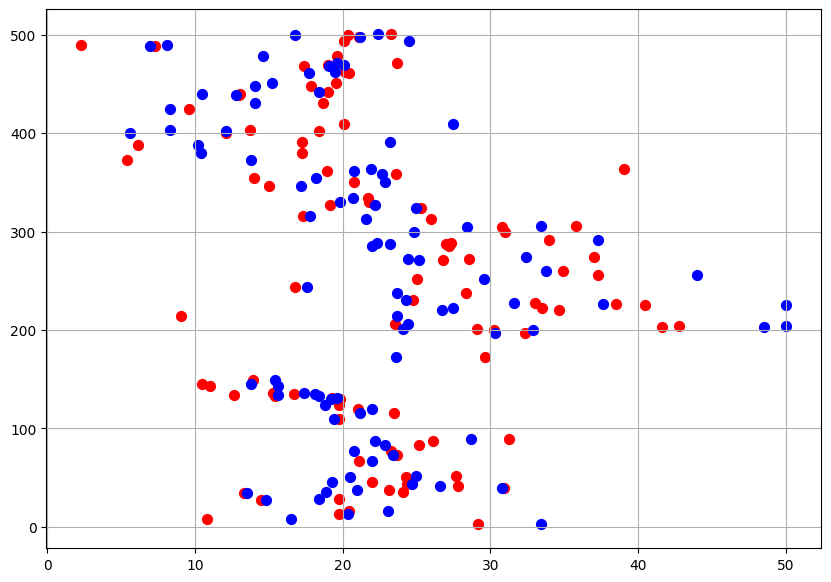

In [30]:
# 시각화
pred_data = {'y_hat':y_hat, 'y_test':y_test}
pred_DF = pd.DataFrame(pred_data)

plt.figure(figsize = (10, 7))
plt.scatter(x= pred_DF['y_hat'], y=pred_DF.index , s=50, c='red')
plt.scatter(x= pred_DF['y_test'],y=pred_DF.index , s=50, c='blue')

plt.grid(True)
plt.show()


## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

Model_dt = DecisionTreeRegressor(random_state = 2045)
Model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2045)

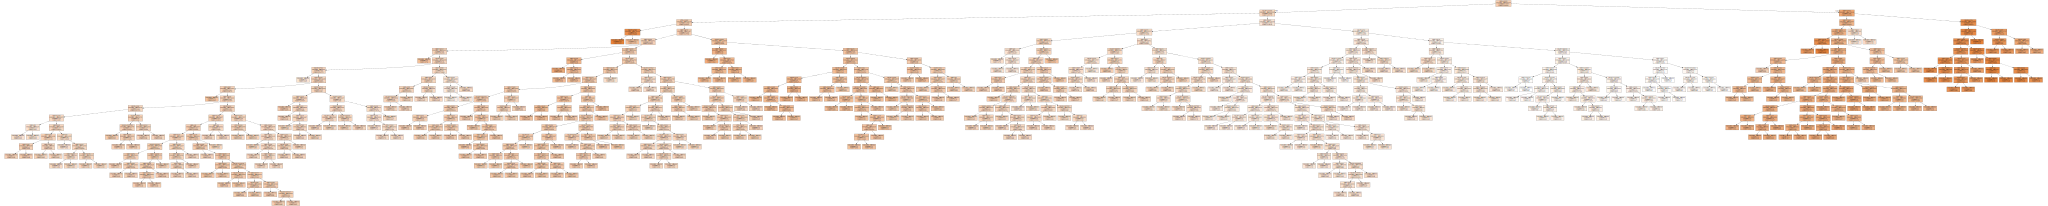

In [32]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_dt,
                                class_names = True,
                                filled = True))

In [33]:
# predict
y_hat = Model_dt.predict(X_test)

y_hat

array([31.7, 24.7,  8.5, 13.8, 28.7, 22.6, 15.6, 15.2, 28.7,  9.6, 16.2,
       13.9, 36.1, 23.5,  7.2, 36.2, 22. , 13.2, 24.7, 20.4, 20.6, 10.5,
       23.6, 14.3, 44.8, 21.9, 18.5, 48.3, 15. , 11.7, 23.1,  7.2, 21.2,
       31.5, 16.1, 15. , 28.5, 22.9, 19.1, 18. , 34.6, 22.7, 15.2, 25.3,
       13.1, 21.9, 23.1,  8.8, 28.7, 24. , 24.7, 24.8, 20.9, 16.2, 19.9,
       32.5, 16.8, 17.5, 13.8, 24.3, 24.7, 12.7, 19.3, 22.3, 11.7, 17.5,
       22.2, 31.7, 21.9, 24.5, 20.2, 50. , 21.9, 29.9, 35.2, 11.3, 27.9,
       23.9, 31. , 45.4, 20. , 23.7, 26.6, 23.1, 18.9, 15. , 22.9, 34.9,
       20.3, 21.4, 14.3, 22.2, 17.1, 19. , 19.8, 15.6, 20.4, 21.7, 15.6,
       19.9, 21.9, 50. ])

In [34]:
# evaluation
mse1 = mean_squared_error(y_test, y_hat)
print('RMSE', np.sqrt(mse1))
print('R2', r2_score(y_test, y_hat))

RMSE 3.731477129586546
R2 0.7972874354561101


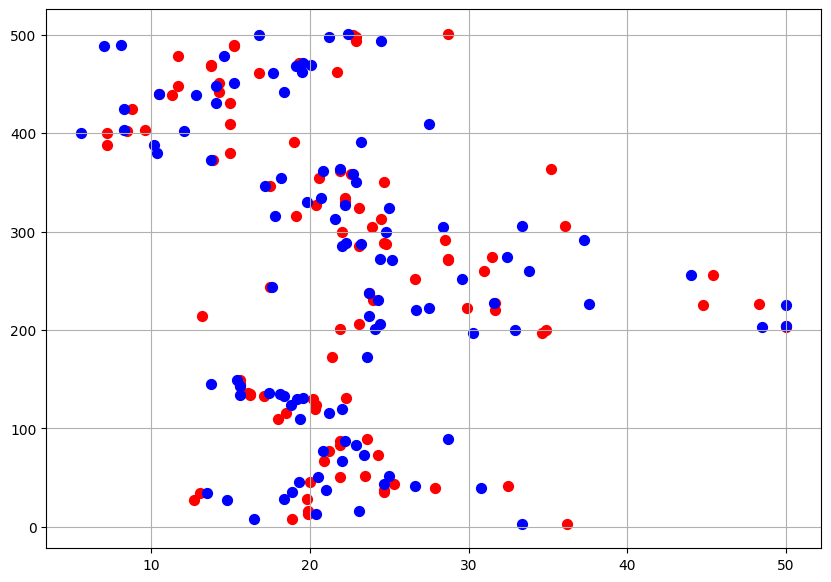

In [35]:
# 시각화
pred_data = {'y_hat':y_hat, 'y_test':y_test}
pred_DF = pd.DataFrame(pred_data)

plt.figure(figsize = (10, 7))
plt.scatter(x= pred_DF['y_hat'], y=pred_DF.index , s=50, c='red')
plt.scatter(x= pred_DF['y_test'],y=pred_DF.index , s=50, c='blue')

plt.grid(True)
plt.show()


In [36]:
# 모델 스펙
Model_dt.__getstate__()

{'criterion': 'squared_error',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 2045,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object),
 'n_features_in_': 13,
 'n_outputs_': 1,
 'max_features_': 13,
 'tree_': <sklearn.tree._tree.Tree at 0x1abae1155a0>,
 '_sklearn_version': '1.2.0'}

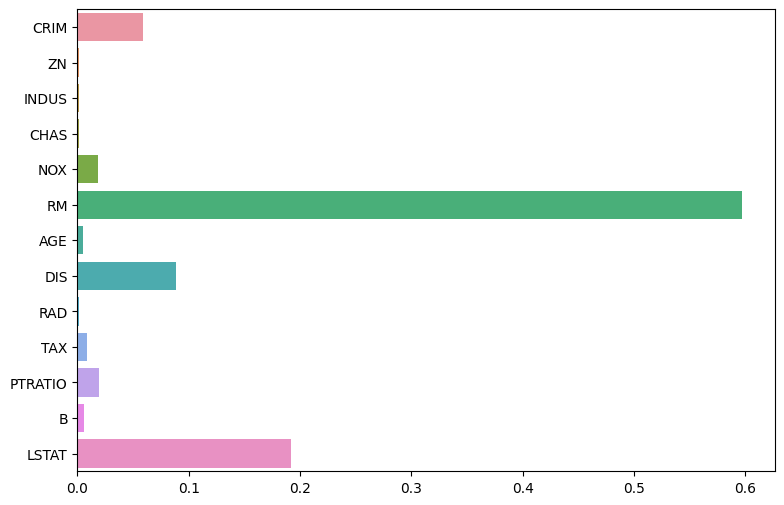

In [37]:
# feature importance
plt.figure(figsize = (9, 6))
sns.barplot(x = Model_dt.feature_importances_,
            y = X.columns)
plt.show()

## RandomForest(Ensemble)

In [38]:
from sklearn.ensemble import RandomForestRegressor

Model_rf = RandomForestRegressor(random_state = 2045) # default 100개
Model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=2045)

In [39]:
# predict
y_hat = Model_rf.predict(X_test)
y_hat

array([32.693, 20.76 , 11.409, 13.112, 26.08 , 20.876, 13.548, 15.363,
       26.331, 10.41 , 15.503, 12.779, 34.166, 26.156,  8.947, 34.442,
       30.556, 19.17 , 23.299, 19.071, 19.213, 10.427, 30.709, 15.733,
       45.568, 22.573, 20.566, 45.557, 18.654, 14.197, 23.562,  8.29 ,
       21.294, 31.178, 16.01 , 20.733, 32.505, 20.413, 18.362, 19.407,
       32.405, 19.625, 15.298, 24.837, 14.142, 23.629, 21.754,  9.769,
       23.757, 21.228, 23.5  , 24.048, 20.615, 17.08 , 19.381, 29.113,
       18.754, 18.861, 16.243, 24.131, 20.863, 15.612, 20.943, 20.951,
       13.985, 18.049, 23.262, 28.743, 20.712, 23.438, 20.054, 47.337,
       23.169, 25.929, 43.162, 11.906, 27.979, 26.71 , 32.761, 42.979,
       19.546, 24.835, 31.069, 22.492, 18.194, 17.558, 20.654, 34.094,
       21.577, 23.494, 15.626, 23.031, 17.198, 15.631, 19.652, 14.908,
       21.027, 20.44 , 14.876, 20.864, 23.504, 47.744])

In [40]:
# evaluation
mse1 = mean_squared_error(y_test, y_hat)
print('RMSE', np.sqrt(mse1))
print('R2', r2_score(y_test, y_hat))

RMSE 3.386181344529441
R2 0.8330680274883506


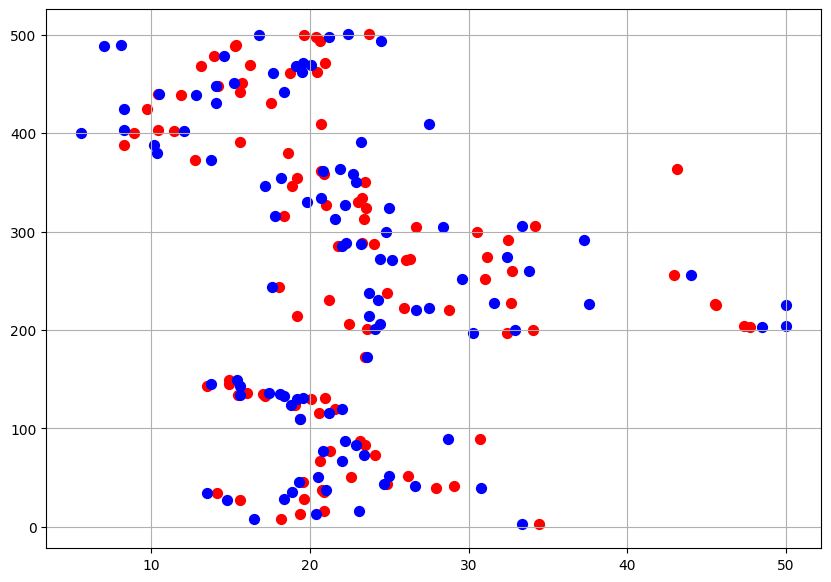

In [41]:
# 시각화
pred_data = {'y_hat':y_hat, 'y_test':y_test}
pred_DF = pd.DataFrame(pred_data)

plt.figure(figsize = (10, 7))
plt.scatter(x= pred_DF['y_hat'], y=pred_DF.index , s=50, c='red')
plt.scatter(x= pred_DF['y_test'],y=pred_DF.index , s=50, c='blue')

plt.grid(True)
plt.show()


In [42]:
# 모델 스펙
Model_rf.__getstate__()

{'estimator': DecisionTreeRegressor(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'base_estimator': 'deprecated',
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': 2045,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'squared_error',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object),
 'n_features_in_': 13,
 'n_outputs_': 1,
 '_estimator': DecisionTreeRegressor(),
 'estimators_': [DecisionTreeRegressor(max_features=1.0, 

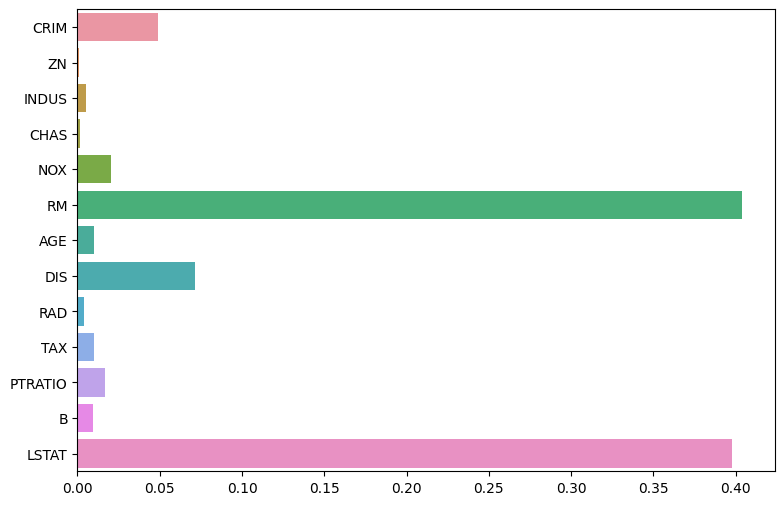

In [43]:
# feature importance
plt.figure(figsize = (9, 6))
sns.barplot(x = Model_rf.feature_importances_,
            y = X.columns)
plt.show()

## Adaptive Boosting

In [44]:
from sklearn.ensemble import AdaBoostRegressor

Model_ab = AdaBoostRegressor(random_state = 2045)
Model_ab.fit(X_train, y_train)

AdaBoostRegressor(random_state=2045)

In [45]:
# predict
y_hat = Model_ab.predict(X_test)

# evaluation
mse1 = mean_squared_error(y_test, y_hat)
print('RMSE', np.sqrt(mse1))
print('R2', r2_score(y_test, y_hat))

RMSE 3.7925612832586957
R2 0.7905963178260266


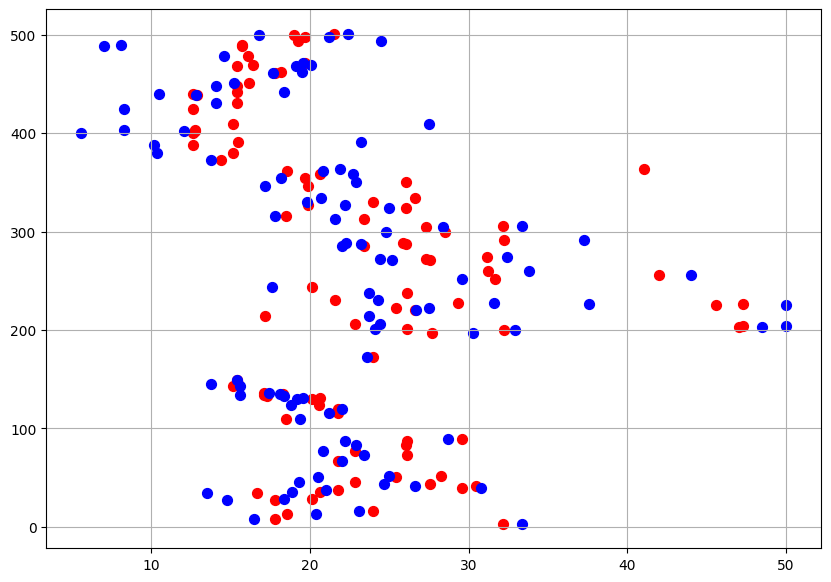

In [46]:
# 시각화
pred_data = {'y_hat':y_hat, 'y_test':y_test}
pred_DF = pd.DataFrame(pred_data)

plt.figure(figsize = (10, 7))
plt.scatter(x= pred_DF['y_hat'], y=pred_DF.index , s=50, c='red')
plt.scatter(x= pred_DF['y_test'],y=pred_DF.index , s=50, c='blue')

plt.grid(True)
plt.show()

In [47]:
# 모델 스펙
Model_ab.__getstate__()

{'estimator': None,
 'n_estimators': 50,
 'estimator_params': (),
 'base_estimator': 'deprecated',
 'learning_rate': 1.0,
 'random_state': 2045,
 'loss': 'linear',
 'feature_names_in_': array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object),
 'n_features_in_': 13,
 '_estimator': DecisionTreeRegressor(max_depth=3),
 'estimators_': [DecisionTreeRegressor(max_depth=3, random_state=1478204279),
  DecisionTreeRegressor(max_depth=3, random_state=853088979),
  DecisionTreeRegressor(max_depth=3, random_state=388478834),
  DecisionTreeRegressor(max_depth=3, random_state=170575731),
  DecisionTreeRegressor(max_depth=3, random_state=726579248),
  DecisionTreeRegressor(max_depth=3, random_state=267387916),
  DecisionTreeRegressor(max_depth=3, random_state=1472904698),
  DecisionTreeRegressor(max_depth=3, random_state=618154570),
  DecisionTreeRegressor(max_depth=3, random_state=559488106),
  DecisionTreeRegressor(max_depth=3, 

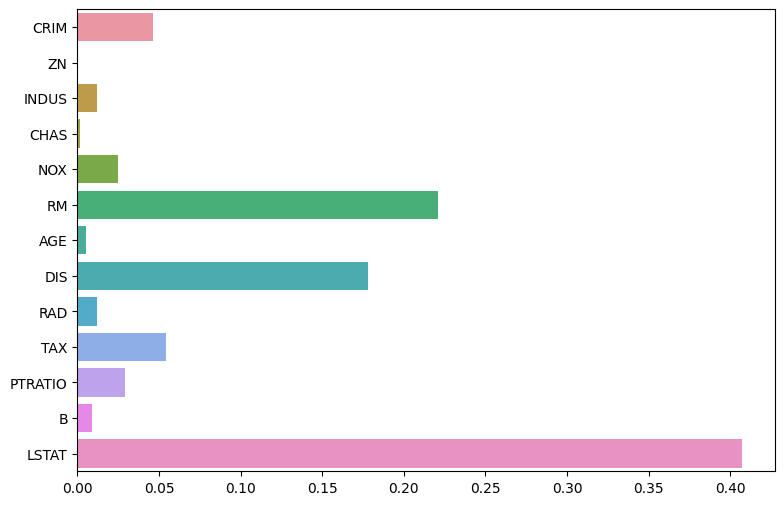

In [48]:
# feature importance
plt.figure(figsize = (9, 6))
sns.barplot(x = Model_ab.feature_importances_,
            y = X.columns)
plt.show()

## Gradient Boosting Machine

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

Model_gbm = GradientBoostingRegressor(random_state = 2045)
Model_gbm.fit(X_train, y_train)

GradientBoostingRegressor(random_state=2045)

In [50]:
# predict
y_hat = Model_gbm.predict(X_test)

# evaluation
mse1 = mean_squared_error(y_test, y_hat)
print('RMSE', np.sqrt(mse1))
print('R2', r2_score(y_test, y_hat))

RMSE 3.4255768430173577
R2 0.8291611938150315


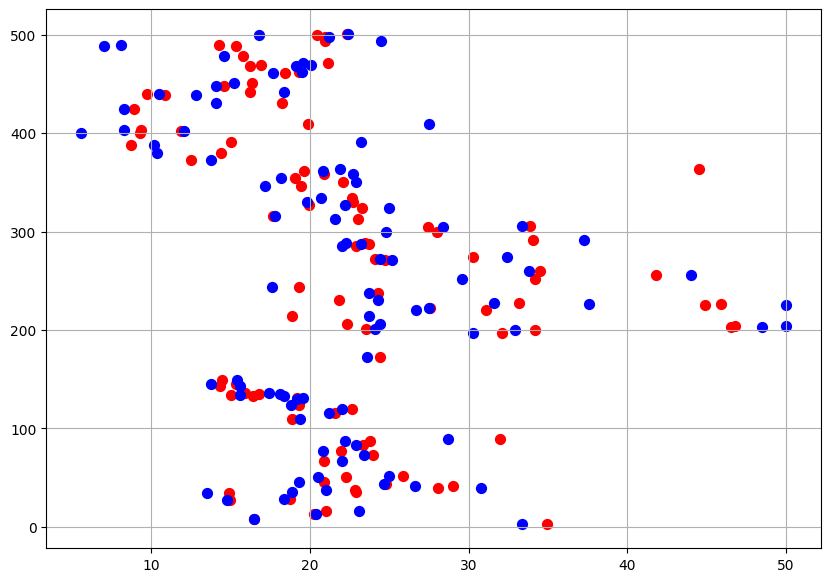

In [51]:
# 시각화
pred_data = {'y_hat':y_hat, 'y_test':y_test}
pred_DF = pd.DataFrame(pred_data)

plt.figure(figsize = (10, 7))
plt.scatter(x= pred_DF['y_hat'], y=pred_DF.index , s=50, c='red')
plt.scatter(x= pred_DF['y_test'],y=pred_DF.index , s=50, c='blue')

plt.grid(True)
plt.show()

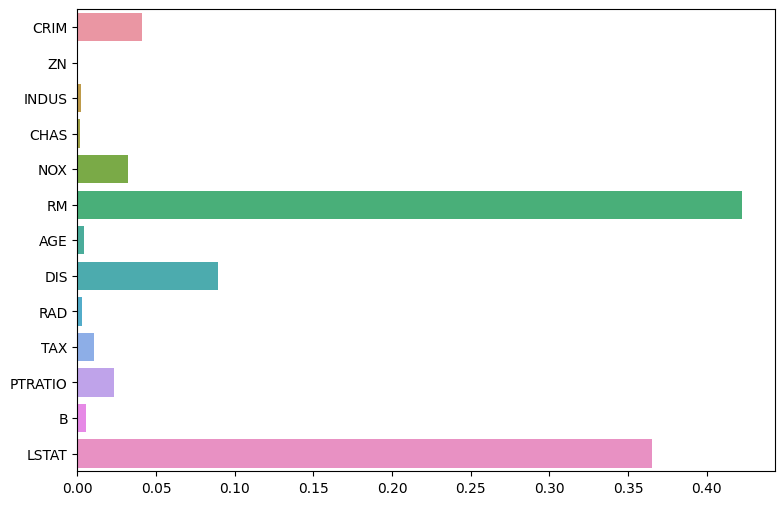

In [52]:
# feature importance
plt.figure(figsize = (9, 6))
sns.barplot(x = Model_gbm.feature_importances_,
            y = X.columns)
plt.show()

## LightGBM

In [53]:
from lightgbm import LGBMRegressor

Model_lgbm = LGBMRegressor(random_state = 2045)

Model_lgbm.fit(X_train, y_train)

LGBMRegressor(random_state=2045)

In [54]:
# predict
y_hat = Model_lgbm.predict(X_test)

# evaluation
mse1 = mean_squared_error(y_test, y_hat)
print('RMSE', np.sqrt(mse1))
print('R2', r2_score(y_test, y_hat))


RMSE 3.5242515194289847
R2 0.8191773244532935


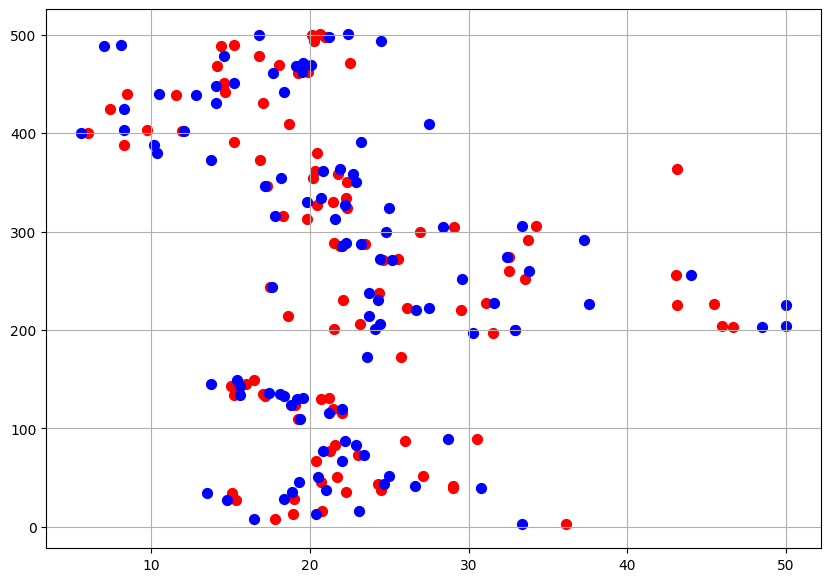

In [55]:
# 시각화
pred_data = {'y_hat':y_hat, 'y_test':y_test}
pred_DF = pd.DataFrame(pred_data)

plt.figure(figsize = (10, 7))
plt.scatter(x= pred_DF['y_hat'], y=pred_DF.index , s=50, c='red')
plt.scatter(x= pred_DF['y_test'],y=pred_DF.index , s=50, c='blue')

plt.grid(True)
plt.show()

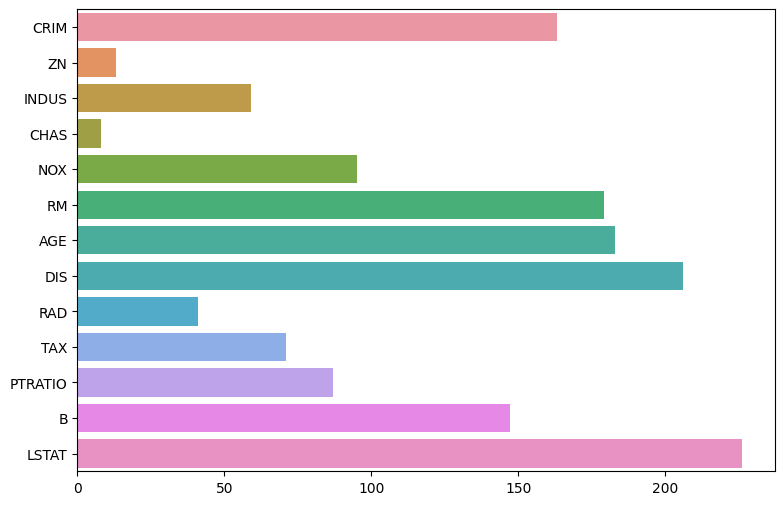

In [56]:
# feature importance
plt.figure(figsize = (9, 6))
sns.barplot(x = Model_lgbm.feature_importances_,
            y = X.columns)
plt.show()

## EXtra Gradient Boosting

In [58]:
# !pip install xgboost

     --------------------------------------- 89.1/89.1 MB 46.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from xgboost import XGBRegressor

Model_xgb = XGBRegressor(random_state = 2045)

Model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2045, ...)

In [60]:
# predict
y_hat = Model_xgb.predict(X_test)

# evaluation
mse1 = mean_squared_error(y_test, y_hat)
print('RMSE', np.sqrt(mse1))
print('R2', r2_score(y_test, y_hat))

RMSE 3.752949697188682
R2 0.794947727643877


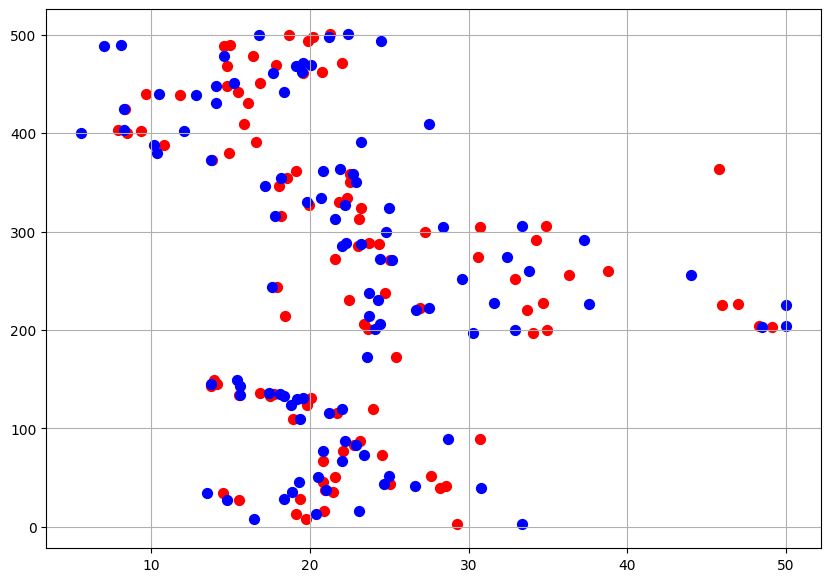

In [61]:
# 시각화
pred_data = {'y_hat':y_hat, 'y_test':y_test}
pred_DF = pd.DataFrame(pred_data)

plt.figure(figsize = (10, 7))
plt.scatter(x= pred_DF['y_hat'], y=pred_DF.index , s=50, c='red')
plt.scatter(x= pred_DF['y_test'],y=pred_DF.index , s=50, c='blue')

plt.grid(True)
plt.show()

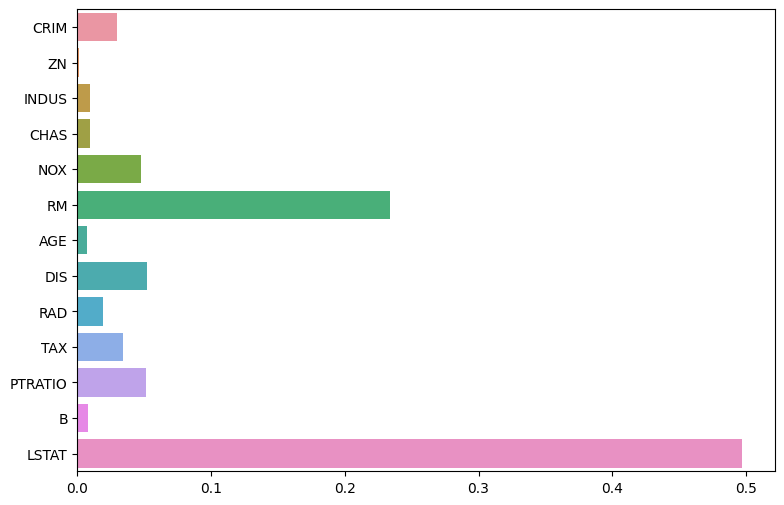

In [62]:
# feature importance
plt.figure(figsize = (9, 6))
sns.barplot(x = Model_xgb.feature_importances_,
            y = X.columns)
plt.show()

## K Nearest Neighbors

In [63]:
from sklearn.neighbors import KNeighborsRegressor


Model_knn = KNeighborsRegressor(n_neighbors = 3)

Model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [64]:
# predict
y_hat = Model_knn.predict(X_test)

# evaluation
mse1 = mean_squared_error(y_test, y_hat)
print('RMSE', np.sqrt(mse1))
print('R2', r2_score(y_test, y_hat))

RMSE 5.112528930941787
R2 0.6194684615348736


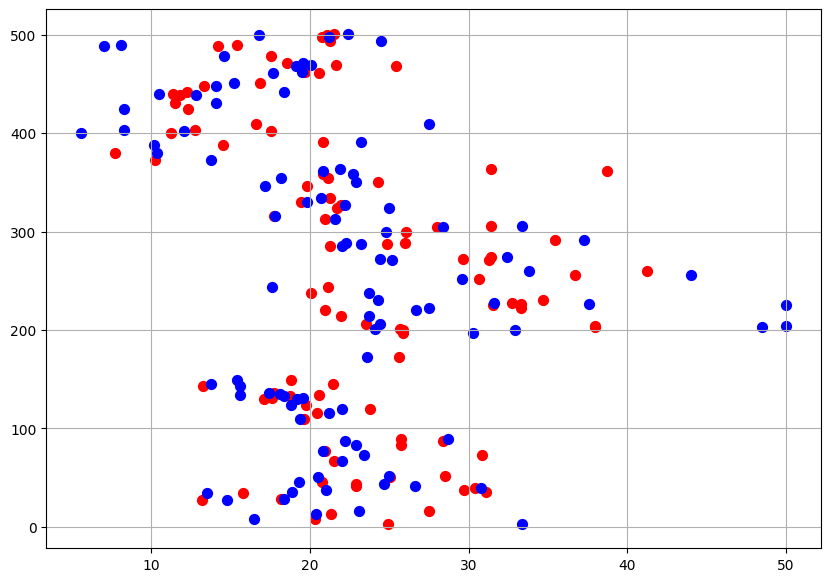

In [65]:
# 시각화
pred_data = {'y_hat':y_hat, 'y_test':y_test}
pred_DF = pd.DataFrame(pred_data)

plt.figure(figsize = (10, 7))
plt.scatter(x= pred_DF['y_hat'], y=pred_DF.index , s=50, c='red')
plt.scatter(x= pred_DF['y_test'],y=pred_DF.index , s=50, c='blue')

plt.grid(True)
plt.show()

# base model result
```
# LR
RMSE 4.358583622645482
R2 0.7234269461973974

# DT
RMSE 3.731477129586546
R2 0.7972874354561101

#RF
RMSE 3.386181344529441
R2 0.8330680274883506

# AdaBoost
RMSE 3.7925612832586957
R2 0.7905963178260266

# GBM
RMSE 3.4255768430173577
R2 0.8291611938150315

# LGBM
RMSE 3.5242515194289847
R2 0.8191773244532935

#XGB
RMSE 3.752949697188682
R2 0.794947727643877

# KNN
RMSE 5.112528930941787
R2 0.6194684615348736
```

# 
# 
# 
# The End
# 
# 
# 